In [1]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [2]:
def readDatas(dataPath: str):
    return pd.read_csv(dataPath,delimiter=',', header='infer')

In [4]:
def plotDataDistribution(df_world_happiness):
    fig,axes = plt.subplots(nrows=2,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Economy..GDP.per.Capita."])
    axes[1].set_title("GDP")
    plt.show()

In [5]:
def plotData(df_world_happiness):
    fig,axes = plt.subplots()

    axes.plot(df_world_happiness["Economy..GDP.per.Capita."],df_world_happiness["Happiness.Score"], 'ro') 
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_title('GDP - Happiness')
    plt.show()

def getTrainingAndValidationSets(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationDatas(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')   #train data are plotted by red and circle sign
    plt.plot(validationInputSet, validationOutputSet, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
    axes.set_title("train and validation data")
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    plt.legend()
    plt.show()

def getRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    xx = [[el] for el in trainingInputSet]

    regressor = linear_model.LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor

def plotRegressor(df_world_happiness):

    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  #train data are plotted by red and circle sign
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

def getErrors(df_world_happiness):
    _,_,validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError

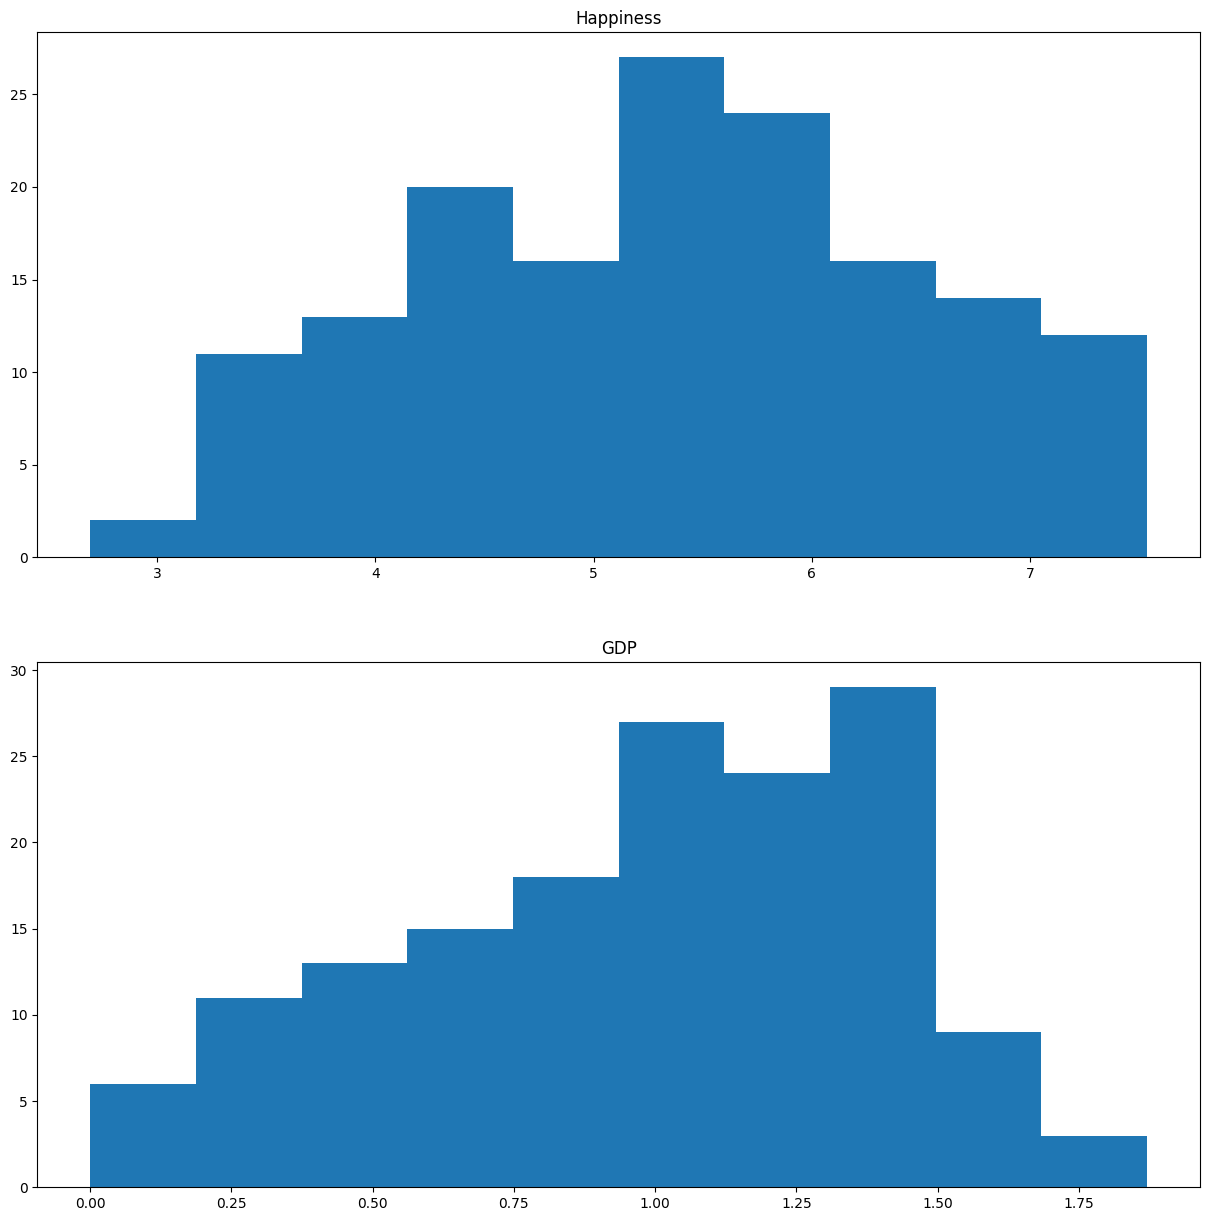

In [8]:
world_happiness = readDatas("v1_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

plotDataDistribution(world_happiness)

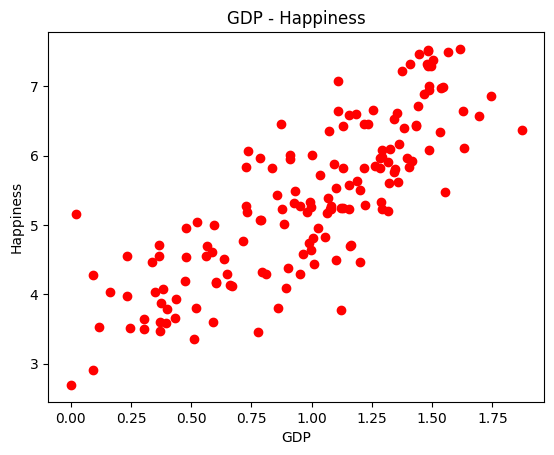

In [9]:
plotData(world_happiness)

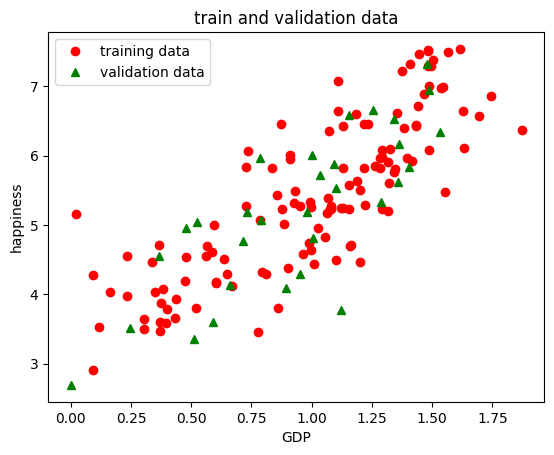

In [10]:
plotTrainingAndValidationDatas(world_happiness)

In [11]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.1712835643644826  +  2.2115202740912157  * x


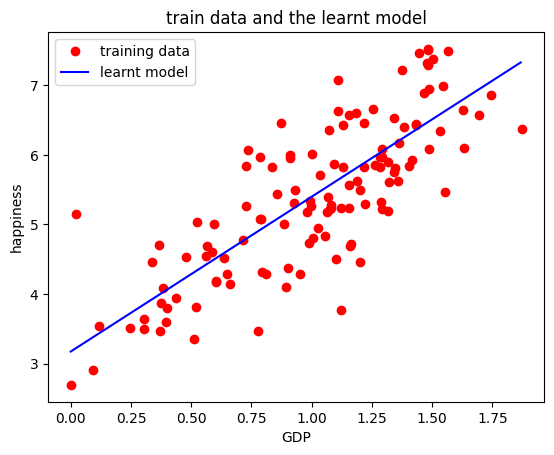

In [12]:
plotRegressor(world_happiness)

In [13]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.44780684770546697
Computed error: 0.44780684770546697


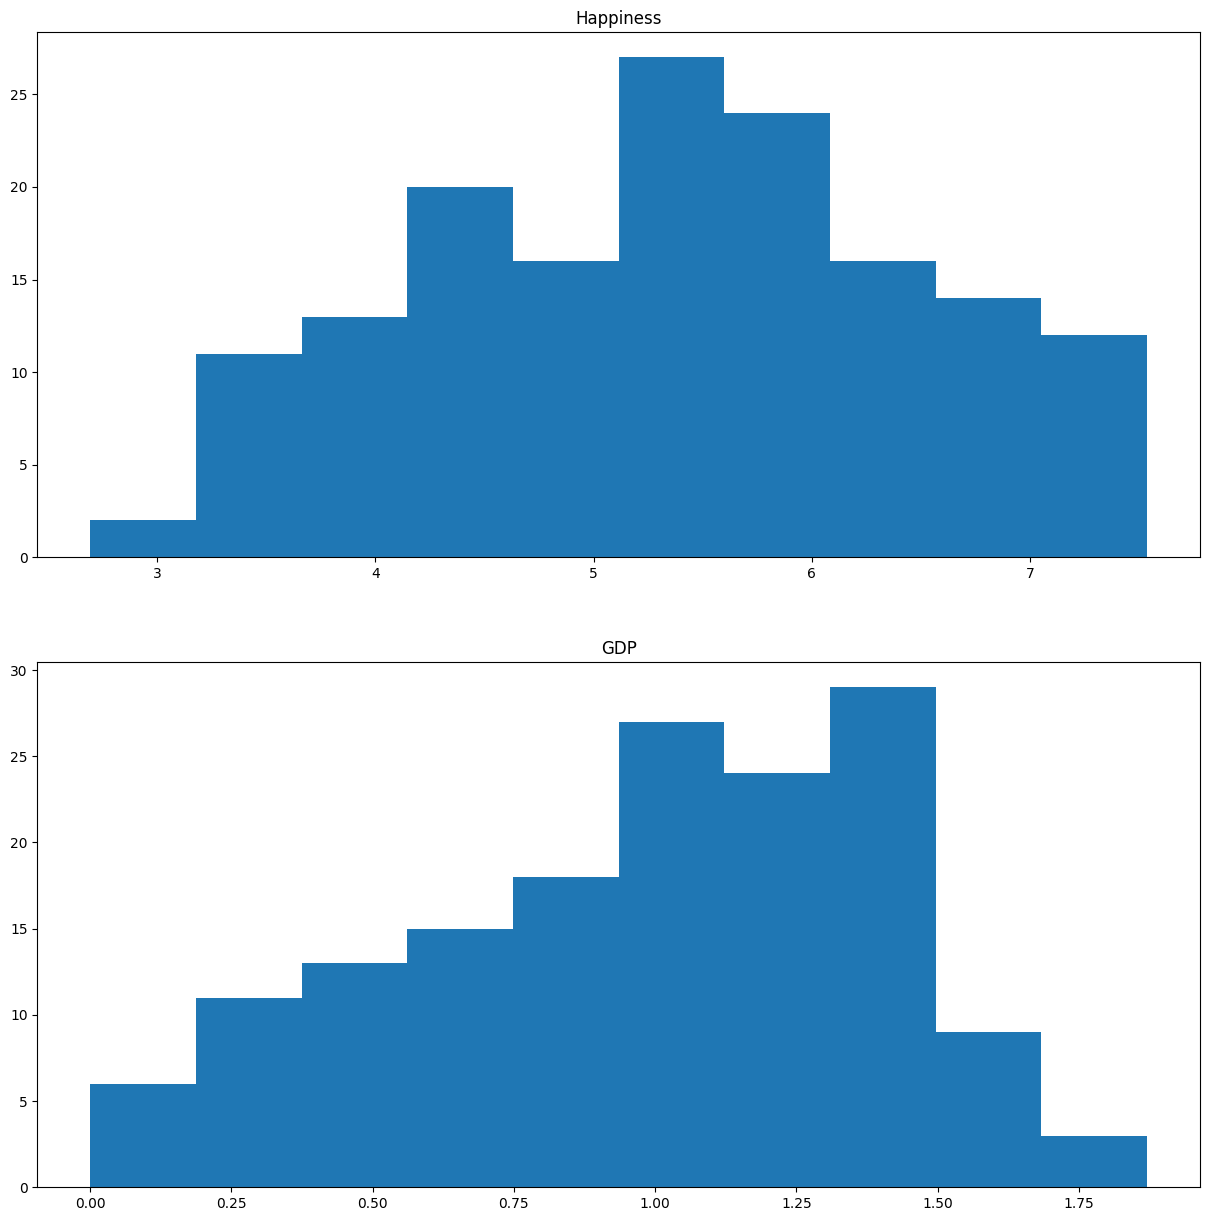

In [15]:
#PROBLEMA 2

world_happiness = readDatas("v2_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

plotDataDistribution(world_happiness)

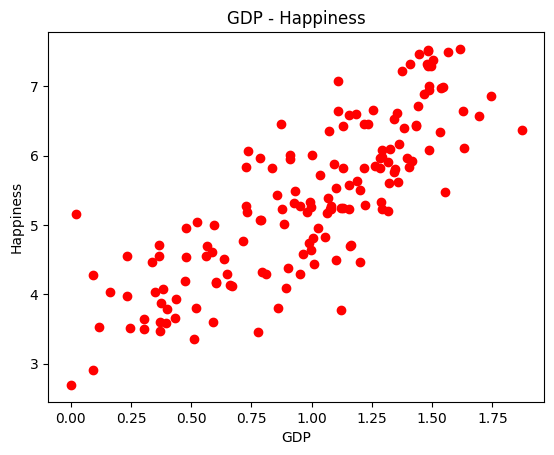

In [16]:
plotData(world_happiness)


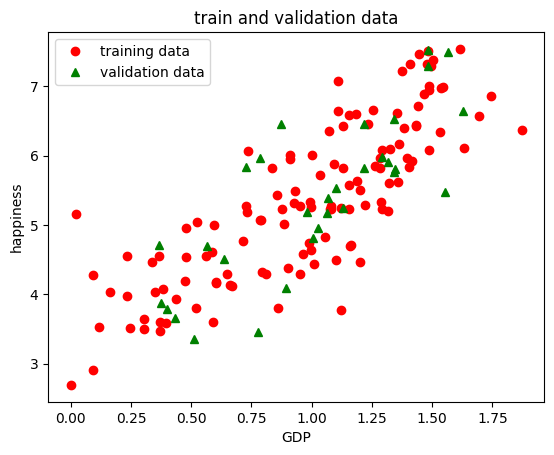

In [17]:
plotTrainingAndValidationDatas(world_happiness)


In [18]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.165473324895144  +  2.1536077572240107  * x


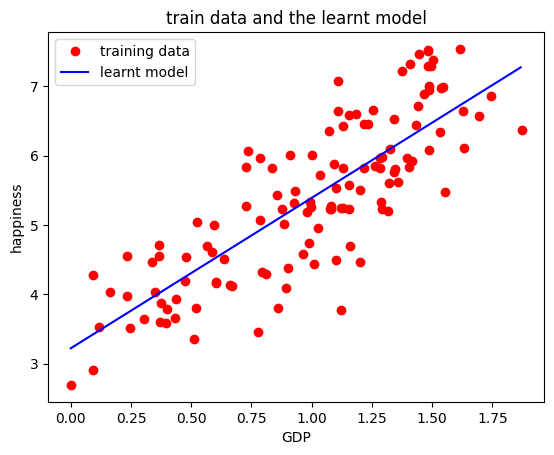

In [19]:
plotRegressor(world_happiness)


In [20]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.44779020542626696
Computed error: 0.44779020542626696


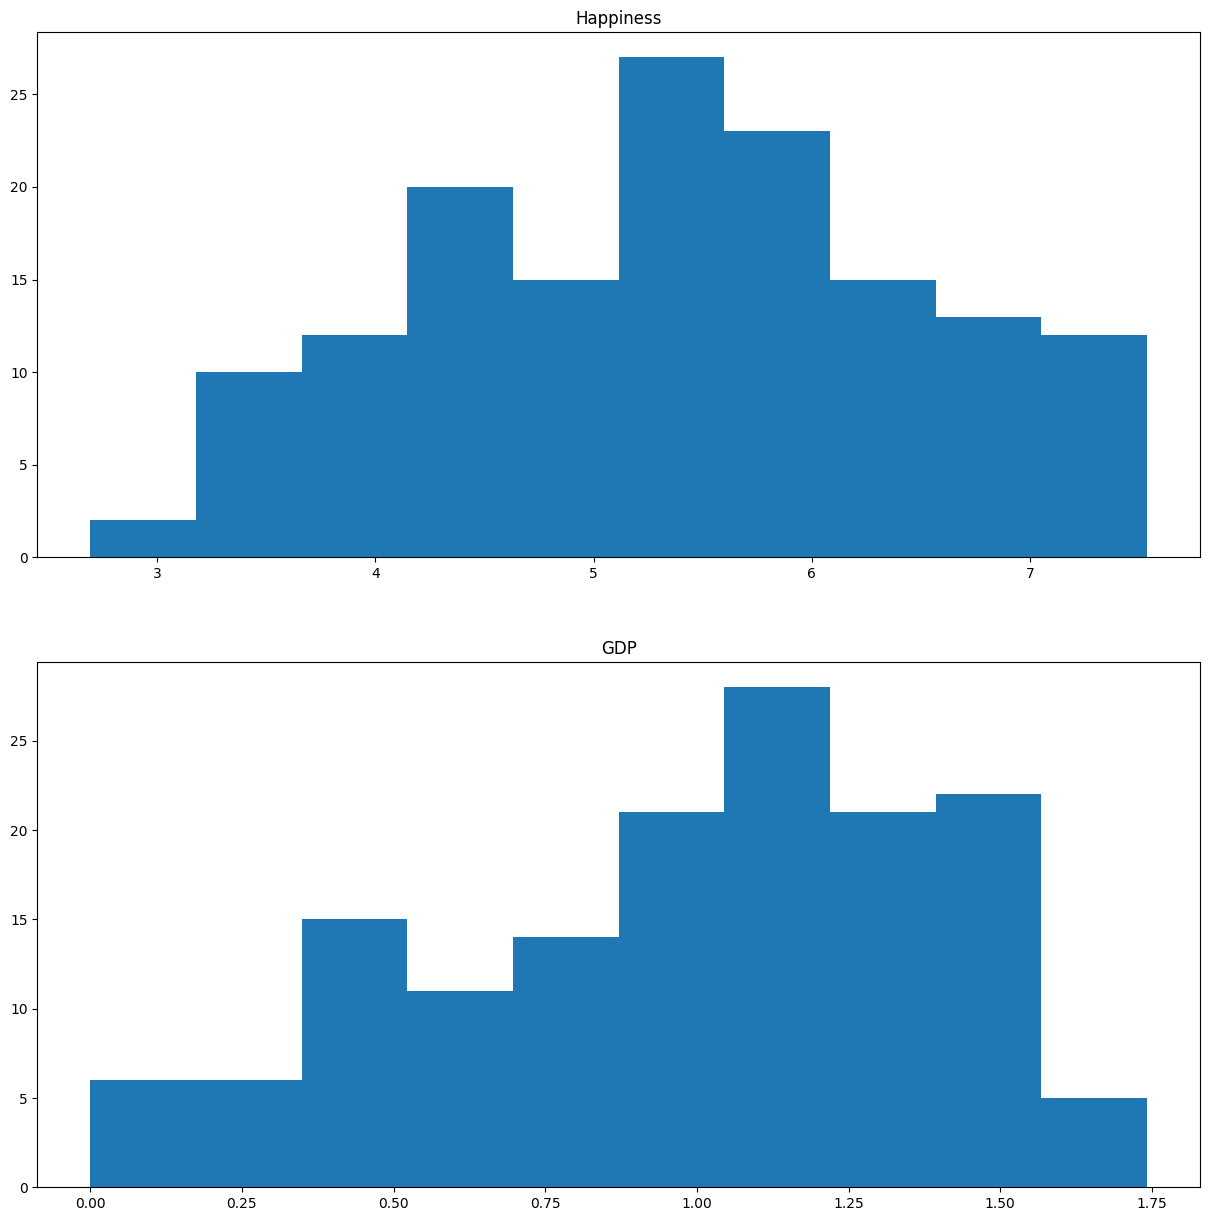

In [21]:
world_happiness = readDatas("v3_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

plotDataDistribution(world_happiness)

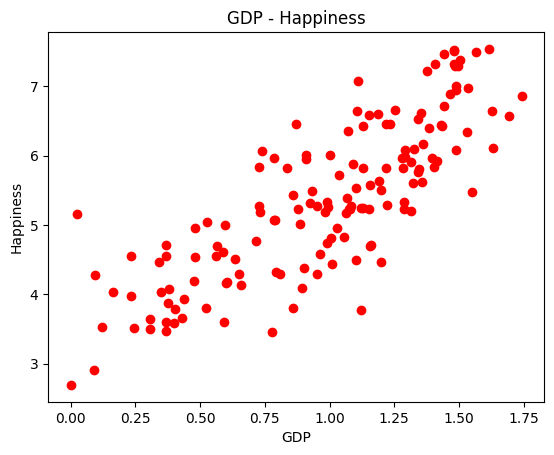

In [22]:
plotData(world_happiness)


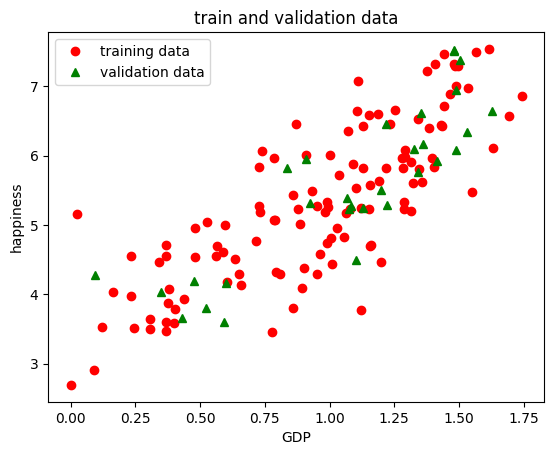

In [23]:
plotTrainingAndValidationDatas(world_happiness)

In [24]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.261402945740349  +  2.1190062081317285  * x


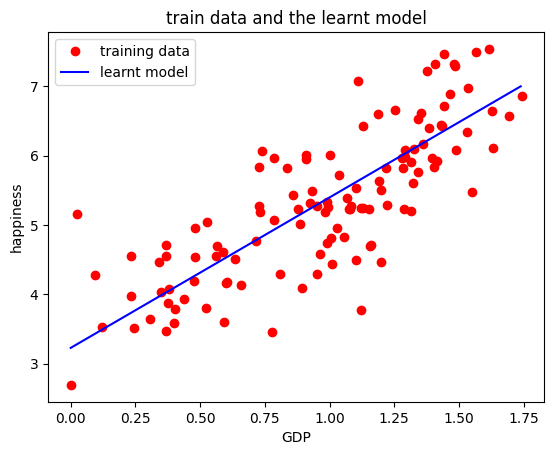

In [25]:
plotRegressor(world_happiness)

In [34]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.5042956296627823
Computed error: 0.5042956296627824
